In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from Twitter_bot_detection_713.data_prep import tweet_df_cleaner, user_df_cleaner, get_final_tweet_data

In [3]:
df = get_final_tweet_data(en=True)
df

,author_id,id,lang,text,created_at,lag,possibly_sensitive,referenced_tweets,reply_category,like_count,quote_count,reply_count,retweet_count,n_mentions,target
13,1000197919,1261733558474829824,en,@trekonomics Same here. Best pate ever....have...,2020-05-16 19:01:36+00:00,33 days 14:13:11,False,True,Reply_to_other,0,0,0,0,1,human
14,1000197919,1264695397588406272,en,PCC is a great example....reach out to your el...,2020-05-24 23:10:54+00:00,8 days 04:09:18,False,True,No_reply,0,0,0,0,0,human
15,1000197919,1271119064941752320,en,both the theorem - and the conclusion. https:/...,2020-06-11 16:36:15+00:00,17 days 17:25:21,False,True,No_reply,0,0,0,0,0,human
16,1000197919,1273846820133695488,en,@GeneralCattis they're learning from the best!,2020-06-19 05:15:23+00:00,7 days 12:39:08,False,True,Reply_to_other,0,0,0,0,1,human
17,1000197919,1275472007769976832,en,this thread... https://t.co/OSveBlPctt,2020-06-23 16:53:18+00:00,4 days 11:37:55,False,True,No_reply,0,0,0,0,0,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353366,999977095106367488,1426676881638793216,en,you ruined everything good\nalways said you we...,2021-08-14 22:47:29+00:00,0 days 13:31:13,False,False,No_reply,0,0,0,0,0,human
2353367,999977095106367488,1427777414088777728,en,for every question why \nyou were my because,2021-08-17 23:40:36+00:00,3 days 00:53:07,False,False,No_reply,0,0,0,0,0,human
2353369,999977095106367488,1431950553173659648,en,song i wish someone wrote for me pt1: https://...,2021-08-29 12:03:10+00:00,8 days 15:31:58,False,False,No_reply,0,0,0,0,0,human
2353371,999977095106367488,1435588625811611648,en,song i wish someone wrote for me pt2: https://...,2021-09-08 12:59:34+00:00,5 days 03:18:45,False,False,No_reply,0,0,0,0,0,human


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df['reply_category'].value_counts()

No_reply          1043778
Reply_to_other     517530
Self_reply          51672
Name: reply_category, dtype: int64

## Looking for Duplicates

In [6]:
df.duplicated().sum()

0

## Missing Data

In [7]:
df.isnull().sum()

author_id                 0
id                        0
lang                      0
text                      0
created_at                0
lag                   20005
possibly_sensitive        0
referenced_tweets         0
reply_category            0
like_count                0
quote_count               0
reply_count               0
retweet_count             0
n_mentions                0
target                    0
dtype: int64

In [8]:
df.isnull().sum()/len(df)

author_id             0.000000
id                    0.000000
lang                  0.000000
text                  0.000000
created_at            0.000000
lag                   0.012403
possibly_sensitive    0.000000
referenced_tweets     0.000000
reply_category        0.000000
like_count            0.000000
quote_count           0.000000
reply_count           0.000000
retweet_count         0.000000
n_mentions            0.000000
target                0.000000
dtype: float64

For 'lag' maybe a SimpleImputer with 0?

## Outliers and Looking at Graphs

In [9]:
df[['like_count', 'quote_count', 'reply_count', 'retweet_count', 'n_mentions']].describe()

,like_count,quote_count,reply_count,retweet_count,n_mentions
count,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06
mean,6.903973e+02,1.221628e+01,2.206117e+01,9.143618e+01,7.615587e-01
std,1.023481e+04,4.498436e+02,6.113220e+02,1.973959e+03,1.502106e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.656066e+06,2.112120e+05,2.013780e+05,7.445780e+05,5.000000e+01


In [10]:
df.corr()

,author_id,possibly_sensitive,referenced_tweets,like_count,quote_count,reply_count,retweet_count,n_mentions
author_id,1.000000,-0.007272,-0.019425,-0.019090,-0.008625,-0.011415,-0.013648,-0.019233
possibly_sensitive,-0.007272,1.000000,-0.060048,-0.000223,0.000291,0.000083,0.000005,-0.011946
referenced_tweets,-0.019425,-0.060048,1.000000,-0.038007,-0.017314,-0.021420,-0.025439,0.266079
like_count,-0.019090,-0.000223,-0.038007,1.000000,0.696719,0.632435,0.829364,-0.015856
quote_count,-0.008625,0.000291,-0.017314,0.696719,1.000000,0.653810,0.714089,-0.007163
reply_count,-0.011415,0.000083,-0.021420,0.632435,0.653810,1.000000,0.602159,-0.007416
retweet_count,-0.013648,0.000005,-0.025439,0.829364,0.714089,0.602159,1.000000,-0.010154
n_mentions,-0.019233,-0.011946,0.266079,-0.015856,-0.007163,-0.007416,-0.010154,1.000000


### N_mentions

<AxesSubplot:xlabel='n_mentions'>

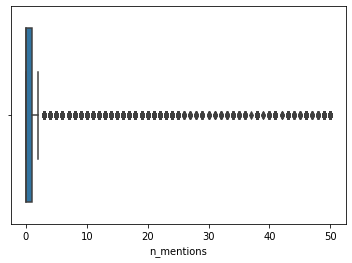

In [11]:
sns.boxplot(data=df, x='n_mentions')

In [12]:
df[df['n_mentions'] < 3].shape

(1519146, 15)

### like_count

<AxesSubplot:xlabel='like_count'>

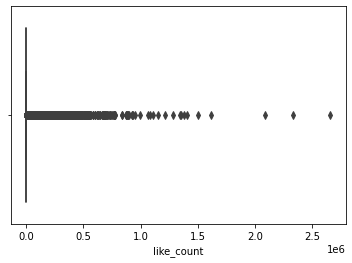

In [13]:
sns.boxplot(data=df, x='like_count')

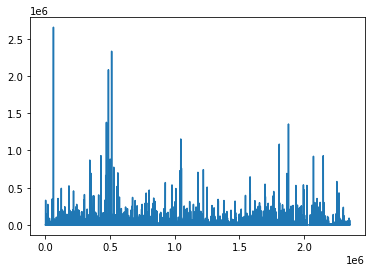

In [14]:
plt.plot(df['like_count'])

### quote_count

<AxesSubplot:xlabel='quote_count'>

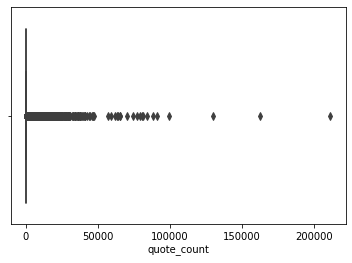

In [15]:
sns.boxplot(data=df, x='quote_count')

In [16]:
df['quote_count'].nunique()

2964

### reply_count

<AxesSubplot:xlabel='reply_count'>

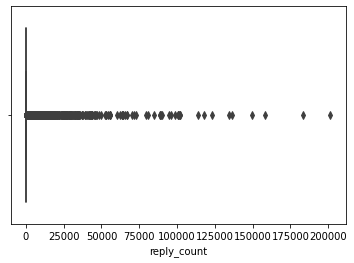

In [17]:
sns.boxplot(data=df, x='reply_count')

### retweet_count

<AxesSubplot:xlabel='retweet_count'>

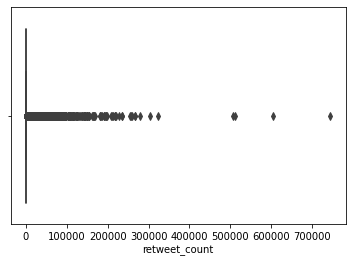

In [18]:
sns.boxplot(data=df, x='retweet_count')

<AxesSubplot:xlabel='reply_category', ylabel='reply_count'>

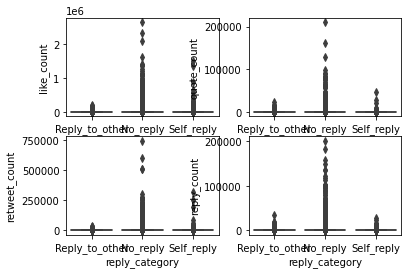

In [19]:
plt.subplot(2,2,1)
sns.boxplot(data=df, x='reply_category', y='like_count')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='reply_category', y='quote_count')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='reply_category', y='retweet_count')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='reply_category', y='reply_count')

## Robust scaler

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
r_scaler = RobustScaler()

In [22]:
num_features = df[['like_count', 'quote_count', 'reply_count', 'retweet_count', 'n_mentions']]
r_scaler.fit(num_features)
df[['like_count', 'quote_count', 'reply_count', 'retweet_count', 'n_mentions']] = r_scaler.transform(num_features)

In [23]:
df.head()

,author_id,id,lang,text,created_at,lag,possibly_sensitive,referenced_tweets,reply_category,like_count,quote_count,reply_count,retweet_count,n_mentions,target
13,1000197919,1261733558474829824,en,@trekonomics Same here. Best pate ever....have...,2020-05-16 19:01:36+00:00,33 days 14:13:11,False,True,Reply_to_other,-0.142857,0.0,0.0,0.0,1.0,human
14,1000197919,1264695397588406272,en,PCC is a great example....reach out to your el...,2020-05-24 23:10:54+00:00,8 days 04:09:18,False,True,No_reply,-0.142857,0.0,0.0,0.0,0.0,human
15,1000197919,1271119064941752320,en,both the theorem - and the conclusion. https:/...,2020-06-11 16:36:15+00:00,17 days 17:25:21,False,True,No_reply,-0.142857,0.0,0.0,0.0,0.0,human
16,1000197919,1273846820133695488,en,@GeneralCattis they're learning from the best!,2020-06-19 05:15:23+00:00,7 days 12:39:08,False,True,Reply_to_other,-0.142857,0.0,0.0,0.0,1.0,human
17,1000197919,1275472007769976832,en,this thread... https://t.co/OSveBlPctt,2020-06-23 16:53:18+00:00,4 days 11:37:55,False,True,No_reply,-0.142857,0.0,0.0,0.0,0.0,human


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
df.possibly_sensitive.value_counts()

False    1601716
True       11264
Name: possibly_sensitive, dtype: int64

In [26]:
df.referenced_tweets.value_counts()

False    912802
True     700178
Name: referenced_tweets, dtype: int64

## Relabeling bool and target (1 & 0 )

In [27]:
df['possibly_sensitive'] = df['possibly_sensitive'].map(lambda x: 1 if x == True else 0)

In [28]:
df['referenced_tweets'] = df['referenced_tweets'].map(lambda x: 1 if x == True else 0)

In [29]:
df['target'] = df['target'].map(lambda x: 1 if x == 'bot' else 0)

## One Hot Encoder

In [30]:
df.reply_category.value_counts()

No_reply          1043778
Reply_to_other     517530
Self_reply          51672
Name: reply_category, dtype: int64

In [31]:
ohe = OneHotEncoder(sparse=False)

ohe.fit(df[['reply_category']])

reply_encoded = ohe.transform(df[['reply_category']])

df['No_reply'], df['Reply_to_other'], df['Self_reply'] = reply_encoded.T

In [32]:
df.head()

,author_id,id,lang,text,created_at,lag,possibly_sensitive,referenced_tweets,reply_category,like_count,quote_count,reply_count,retweet_count,n_mentions,target,No_reply,Reply_to_other,Self_reply
13,1000197919,1261733558474829824,en,@trekonomics Same here. Best pate ever....have...,2020-05-16 19:01:36+00:00,33 days 14:13:11,0,1,Reply_to_other,-0.142857,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0
14,1000197919,1264695397588406272,en,PCC is a great example....reach out to your el...,2020-05-24 23:10:54+00:00,8 days 04:09:18,0,1,No_reply,-0.142857,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
15,1000197919,1271119064941752320,en,both the theorem - and the conclusion. https:/...,2020-06-11 16:36:15+00:00,17 days 17:25:21,0,1,No_reply,-0.142857,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
16,1000197919,1273846820133695488,en,@GeneralCattis they're learning from the best!,2020-06-19 05:15:23+00:00,7 days 12:39:08,0,1,Reply_to_other,-0.142857,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0
17,1000197919,1275472007769976832,en,this thread... https://t.co/OSveBlPctt,2020-06-23 16:53:18+00:00,4 days 11:37:55,0,1,No_reply,-0.142857,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0


## Correlation

In [34]:
df.corr()

,author_id,possibly_sensitive,referenced_tweets,like_count,quote_count,reply_count,retweet_count,n_mentions,target,No_reply,Reply_to_other,Self_reply
author_id,1.000000,-0.007272,-0.019425,-0.019090,-0.008625,-0.011415,-0.013648,-0.019233,0.150894,0.002206,-0.001228,-0.002730
possibly_sensitive,-0.007272,1.000000,-0.060048,-0.000223,0.000291,0.000083,0.000005,-0.011946,0.015395,0.046660,-0.044977,-0.007392
referenced_tweets,-0.019425,-0.060048,1.000000,-0.038007,-0.017314,-0.021420,-0.025439,0.266079,-0.153496,-0.752504,0.692377,0.206671
like_count,-0.019090,-0.000223,-0.038007,1.000000,0.696719,0.632435,0.829364,-0.015856,-0.024831,0.043778,-0.043122,-0.004492
quote_count,-0.008625,0.000291,-0.017314,0.696719,1.000000,0.653810,0.714089,-0.007163,-0.009754,0.017013,-0.016521,-0.002374
reply_count,-0.011415,0.000083,-0.021420,0.632435,0.653810,1.000000,0.602159,-0.007416,-0.013374,0.022996,-0.022198,-0.003561
retweet_count,-0.013648,0.000005,-0.025439,0.829364,0.714089,0.602159,1.000000,-0.010154,-0.015669,0.030384,-0.029854,-0.003314
n_mentions,-0.019233,-0.011946,0.266079,-0.015856,-0.007163,-0.007416,-0.010154,1.000000,-0.063365,-0.361849,0.376642,-0.016480
target,0.150894,0.015395,-0.153496,-0.024831,-0.009754,-0.013374,-0.015669,-0.063365,1.000000,0.092192,-0.079810,-0.038616
No_reply,0.002206,0.046660,-0.752504,0.043778,0.017013,0.022996,0.030384,-0.361849,0.092192,1.000000,-0.930770,-0.246351


<AxesSubplot:>

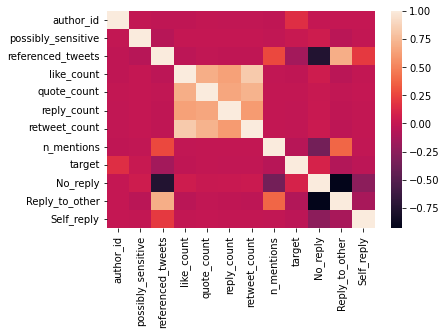

In [37]:
corr = df.corr()
sns.heatmap(corr)